# Machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Régression linéaire avec statsmodels et sklearn

In [2]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

Récupérer des données

In [3]:
frame_pub=pd.read_csv("../data/Advertising.csv",index_col=0)

In [4]:
frame_pub.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
#on crée et on ajuste le modèle
modele_reg1=ols("Sales ~ TV + Radio + Newspaper",data=frame_pub).fit() 

In [6]:
modele_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.58e-96
Time:                        09:38:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
modele_reg1.predict(frame_pub[['TV', 'Radio', 'Newspaper']])

1      20.523974
2      12.337855
3      12.307671
4      17.597830
5      13.188672
6      12.478348
7      11.729760
8      12.122953
9       3.727341
10     12.550849
11      7.032299
12     17.285129
13     10.577121
14      8.826300
15     18.434366
16     20.819300
17     12.823657
18     23.224957
19      9.951682
20     14.166073
21     18.100767
22     14.740538
23      6.489150
24     16.545933
25      8.146519
26     15.610039
27     14.989514
28     17.051673
29     19.410538
30      9.144024
         ...    
171     7.394980
172    14.358274
173     7.607692
174    11.970939
175    13.744357
176    24.786870
177    19.979373
178    12.162046
179    16.010997
180    12.384555
181    10.587200
182    13.928099
183     6.554670
184    24.133100
185    18.538521
186    20.803011
187     9.691373
188    17.076442
189    18.644306
190     6.051624
191    12.489159
192     8.424019
193     4.466230
194    18.486958
195    16.495300
196     5.370342
197     8.165312
198    12.7859

#### Avec sklearn

In [8]:
modele_reg2=LinearRegression()

In [9]:
modele_reg2.fit_intercept=True

Construction des échantillons apprentissage / test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(frame_pub[['TV', 'Radio', 'Newspaper']],
                                                   frame_pub['Sales'],test_size=0.3)

In [12]:
x_train.shape

(140, 3)

In [13]:
modele_reg2.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
modele_reg2.coef_

array([ 0.04619777,  0.19700379, -0.00490802])

In [15]:
modele_reg2.intercept_

2.7279935991228665

In [16]:
y_pred=modele_reg2.predict(x_test)

In [17]:
y_test.std()

5.762644902402579

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
print("MSE de mon modèle : ", mean_squared_error(y_test,y_pred))

MSE de mon modèle :  2.60600151283


In [20]:
def rmse2(y_test,y_pred):
    return np.sqrt(sum((y_test-y_pred)**2)/y_test.shape)

In [21]:
print("RMSE de mon modèle : ", rmse2(y_test,y_pred))

RMSE de mon modèle :  [ 1.61431147]


## ACP

In [22]:
from sklearn.decomposition import PCA

Appliquer une ACP sur les données iris.xlsx représenter les 2 1ère composantes

In [23]:
frame_iris=pd.read_excel("../data/iris.xlsx")

In [24]:
frame_iris.head()

,Long. Sepales,Larg. Sepales,Long. Petales,Larg. Petales,Espece
Iris1,50,33,14,2,Setosa
Iris2,64,28,56,22,Virginica
Iris3,65,28,46,15,Versicolor
Iris4,67,31,56,24,Virginica
Iris5,63,28,51,15,Virginica


In [25]:
modele_acp=PCA()

In [26]:
modele_acp.fit(frame_iris.drop("Espece",axis=1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
modele_acp.explained_variance_ratio_

array([ 0.92293779,  0.05595107,  0.01528903,  0.0058221 ])

<Container object of 4 artists>

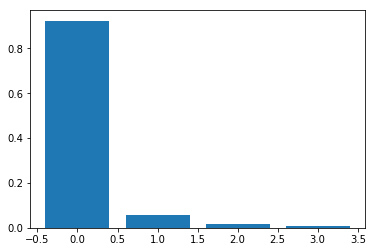

In [28]:
plt.bar(np.arange(4),modele_acp.explained_variance_ratio_)

In [29]:
comp_acp=modele_acp.transform(frame_iris.drop("Espece",axis=1))

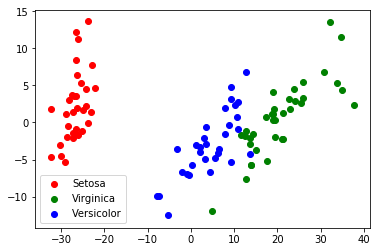

In [30]:
for group, color in zip(frame_iris["Espece"].unique(),["red","green","blue"]):
    plt.scatter(comp_acp[frame_iris["Espece"]==group,0],
                comp_acp[frame_iris["Espece"]==group,1],
                c=color,label=group)
plt.legend()

## K-means

Génération de données

In [31]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [32]:
x_sim, y_sim=make_blobs(n_samples=10000,n_features=10,centers=6,cluster_std=5)

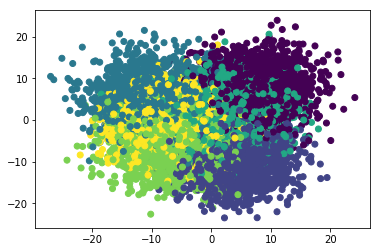

In [33]:
plt.scatter(x_sim[:,0],x_sim[:,1],c=y_sim)

In [34]:
#on crée un objet de la classe Kmeans
modele_km=KMeans(n_clusters=6)

In [35]:
#on recherche les groupes en utilisant le modèle
modele_km.fit(x_sim)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

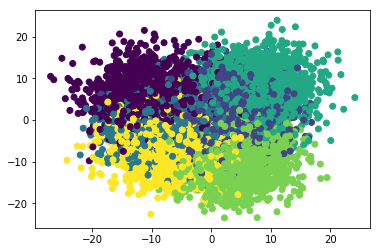

In [36]:
#on représente les groupes obtenus
plt.scatter(x_sim[:,0],x_sim[:,1],c=modele_km.labels_)

In [37]:
pd.crosstab(modele_km.labels_,y_sim)

col_0,0,1,2,3,4,5
row_0,,,,,,
0,0,0,1498,1,40,158
1,78,13,0,1532,10,7
2,2,1,132,9,99,1385
3,1581,0,0,98,9,3
4,0,1652,0,12,0,0
5,6,1,37,15,1508,113


### Traitement d'une image avec les k-means

In [38]:
#on récupère l'image
from scipy.misc import imread

In [39]:
image=imread("../data/New York.jpg")

In [40]:
image.shape

(3264, 4896, 3)

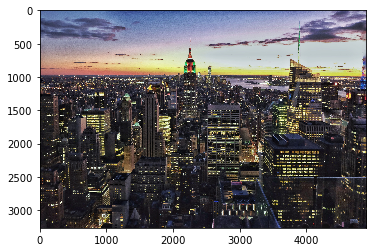

In [41]:
plt.imshow(image)

In [42]:
#on passe à deux dimensions
#image2=(image/255.0).reshape(image.shape[0]*image.shape[1],3)
image2=(image/255.0).reshape(-1,3)

In [43]:
image2.shape

(15980544, 3)

In [44]:
modele_km_ny=KMeans(n_clusters=3)

In [45]:
modele_km_ny.fit(image2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
#reconstruire l'image
label=modele_km_ny.labels_
center=modele_km_ny.cluster_centers_
image_new=center[label]
image_new=(image_new*255.0).reshape(image.shape).astype(np.uint8)

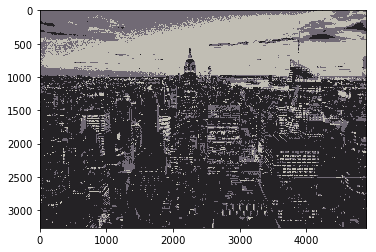

In [47]:
plt.imshow(image_new)
plt.savefig("NY-6couleurs.jpg")

## Analyse de churn

Récupération des données

In [48]:
churn=pd.read_csv("../data/telecom.csv")

In [49]:
import pandas_profiling

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [50]:
report=pandas_profiling.ProfileReport(churn)

In [51]:
report.to_file("rapport_churn.html")

In [52]:
#création de y
y=np.where(churn["Churn?"]=="True.",1,0)

In [53]:
churn.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [54]:
#création de x
x=churn.drop(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan","Churn?",'VMail Plan'],axis=1)

In [55]:
#importation des méthodes
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [56]:
#importation des outils de validation
from sklearn.model_selection import train_test_split

In [57]:
#importation des indicateurs de qualité
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [59]:
#construction des objets pour les modèles
modele_svm=SVC()
modele_rf=RandomForestClassifier(n_estimators=100,max_depth=7)
modele_gbm=GradientBoostingClassifier()
modele_logit=LogisticRegression()
modele_knn=KNeighborsClassifier(n_neighbors=10)

In [60]:
#ajustement des modèles
modele_svm.fit(x_train,y_train)
modele_rf.fit(x_train,y_train)
modele_gbm.fit(x_train,y_train)
modele_logit.fit(x_train,y_train)
modele_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [61]:
# pourcentage de bien classé + mat de conf + AUC
def mes_indicateurs(modele,x_test,y_test):
    pred=modele.predict(x_test)
    print("Accuracy =" ,accuracy_score(y_test,pred))
    print("Matrice de conf : \n" ,confusion_matrix(y_test,pred))
    print("AUC :",roc_auc_score(y_test,pred))

In [62]:
print("SVM")
mes_indicateurs(modele_svm,x_test,y_test)
print("RF")
mes_indicateurs(modele_rf,x_test,y_test)
print("GBM")
mes_indicateurs(modele_gbm,x_test,y_test)
print("Logit")
mes_indicateurs(modele_logit,x_test,y_test)
print("Knn")
mes_indicateurs(modele_knn,x_test,y_test)

SVM
Accuracy = 0.866
Matrice de conf : 
 [[866   0]
 [134   0]]
AUC : 0.5
RF
Accuracy = 0.928
Matrice de conf : 
 [[859   7]
 [ 65  69]]
AUC : 0.753421116128
GBM
Accuracy = 0.92
Matrice de conf : 
 [[841  25]
 [ 55  79]]
AUC : 0.780341939264
Logit
Accuracy = 0.869
Matrice de conf : 
 [[856  10]
 [121  13]]
AUC : 0.542733790631
Knn
Accuracy = 0.893
Matrice de conf : 
 [[860   6]
 [101  33]]
AUC : 0.619670125125


### Choix des hyper-paramètres

In [63]:
#hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

In [64]:
dico_param={"n_estimators":[10,100,1000],"max_depth":[5,7,9]}

In [65]:
modele_grid=GridSearchCV(RandomForestClassifier(),dico_param,scoring="roc_auc",cv=3)

In [66]:
modele_grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [67]:
modele_grid.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [68]:
modele_grid.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83913, std: 0.01765, params: {'max_depth': 5, 'n_estimators': 10},
 mean: 0.86263, std: 0.02033, params: {'max_depth': 5, 'n_estimators': 100},
 mean: 0.86258, std: 0.01705, params: {'max_depth': 5, 'n_estimators': 1000},
 mean: 0.84032, std: 0.02642, params: {'max_depth': 7, 'n_estimators': 10},
 mean: 0.86400, std: 0.01644, params: {'max_depth': 7, 'n_estimators': 100},
 mean: 0.86825, std: 0.01708, params: {'max_depth': 7, 'n_estimators': 1000},
 mean: 0.85602, std: 0.01031, params: {'max_depth': 9, 'n_estimators': 10},
 mean: 0.87089, std: 0.01287, params: {'max_depth': 9, 'n_estimators': 100},
 mean: 0.86919, std: 0.01565, params: {'max_depth': 9, 'n_estimators': 1000}]

### Construction d'un pipeline

In [69]:
from sklearn.pipeline import Pipeline

In [70]:
acp=PCA(n_components=10)
gbm=GradientBoostingClassifier()

pipe=Pipeline(steps=[("acp",acp),("gbm",gbm)])

In [71]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('acp', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('gbm', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=Non...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])

In [72]:
roc_auc_score(y_test,pipe.predict(x_test))

0.76341732446313471